In [1]:
from scipy import *
from astropy.io import fits
import WLanalysis

In [2]:
plane_massive = fits.open('sample_maps/mnv0.10000_om0.30000_As2.1000/snap60_potentialPlane2_normal0.fits')[0].data
plane_massles = fits.open('sample_maps/mnv0.00000_om0.30000_As2.1000/snap60_potentialPlane2_normal0.fits')[0].data

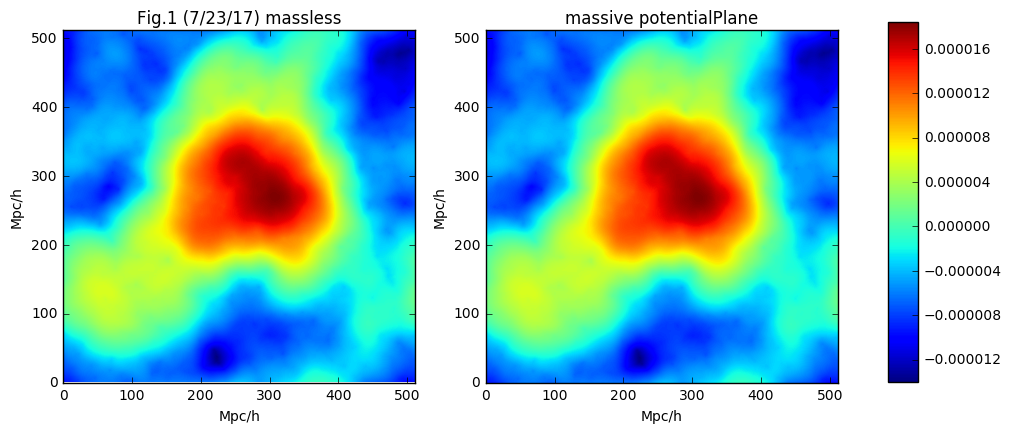

In [5]:
f=figure(figsize=(10,6))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

clb1=ax1.imshow(plane_massles,extent=[0,512, 0,512])
ax1.set_xlabel('Mpc/h')
ax1.set_ylabel('Mpc/h')
ax1.set_title('Fig.1 (7/23/17) massless')

ax2.imshow(plane_massive,extent=[0,512, 0,512])
ax2.set_xlabel('Mpc/h')
ax2.set_ylabel('Mpc/h')
ax2.set_title('massive potentialPlane')

cbar_ax = f.add_axes([0.95, 0.22, 0.03, 0.6])
f.colorbar(clb1, cax=cbar_ax)
show()

In [81]:
conv_massive_z1 = fits.open('sample_maps/mnv0.10000_om0.30000_As2.1000/WLconv_z1.00_0001r.fits')[0].data
conv_massles_z1 = fits.open('sample_maps/mnv0.00000_om0.30000_As2.1000/WLconv_z1.00_0001r.fits')[0].data
#conv_massive_z2 = fits.open('sample_maps/mnv0.10000_om0.30000_As2.1000/WLconv_z2.00_0999r.fits')[0].data
#conv_massles_z2 = fits.open('sample_maps/mnv0.00000_om0.30000_As2.1000/WLconv_z2.00_0999r.fits')[0].data

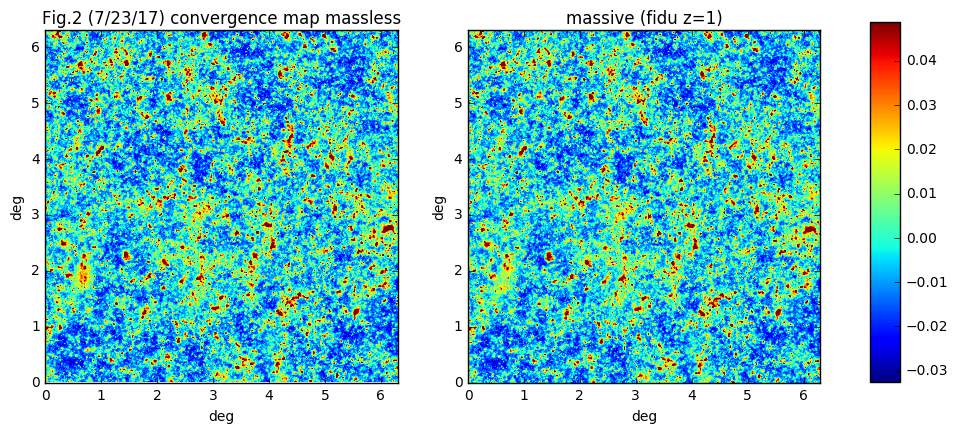

In [82]:
istd = std(conv_massive_z1)

f=figure(figsize=(10,6))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

clb1=ax1.imshow(conv_massles_z1,extent=[0,6.3, 0,6.3],vmin=-2*istd, vmax=3*istd)
ax1.set_xlabel('deg')
ax1.set_ylabel('deg')
ax1.set_title('Fig.2 (7/23/17) convergence map massless')

clb2=ax2.imshow(conv_massive_z1,extent=[0,6.3, 0,6.3],vmin=-2*istd, vmax=3*istd)
ax2.set_xlabel('deg')
ax2.set_ylabel('deg')
ax2.set_title('massive (fidu z=1)')

cbar_ax = f.add_axes([0.95, 0.22, 0.03, 0.6])
f.colorbar(clb2, cax=cbar_ax)
show()

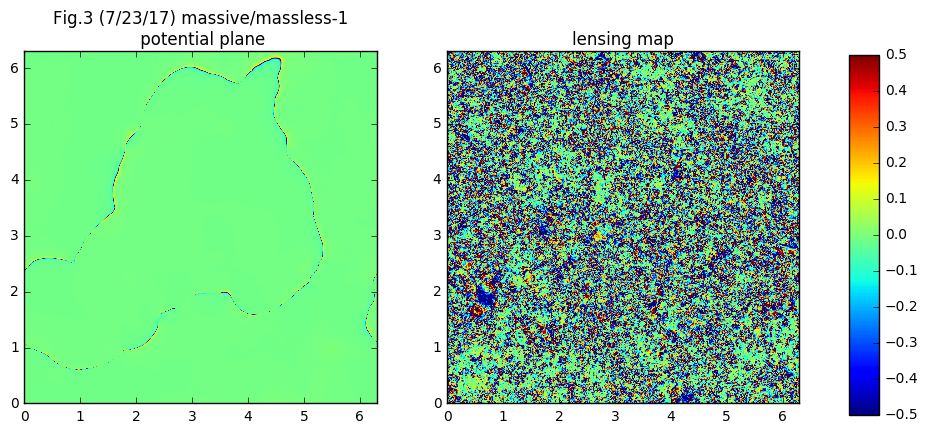

In [85]:
f=figure(figsize=(10,6))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

clb1=ax1.imshow(plane_massive/plane_massles-1,extent=[0,6.3, 0,6.3],vmin=-0.5,vmax=0.5)

clb2=ax2.imshow(conv_massive_z1/conv_massles_z1-1,extent=[0,6.3, 0,6.3],vmin=-0.5,vmax=0.5)
cbar_ax2 = f.add_axes([0.95, 0.2, 0.03, 0.6])
f.colorbar(clb2, cax=cbar_ax2)

ax1.set_title('Fig.3 (7/23/17) massive/massless-1\n potential plane')
ax2.set_title('lensing map')

show()

In [56]:
ell, ps0_z1 = WLanalysis.PowerSpectrum(conv_massles_z1, sizedeg = 6.3**2)
ell, ps1_z1 = WLanalysis.PowerSpectrum(conv_massive_z1, sizedeg = 6.3**2)

In [10]:
ell0_As, ps0_As = genfromtxt('/Users/jia/Desktop/nicaea_2.7/Demo/P_kappa_fidumassless_As').T
ell0_s8, ps0_s8 = genfromtxt('/Users/jia/Desktop/nicaea_2.7/Demo/P_kappa_fidumassless_s8').T
ell0_s8_linear, ps0_s8_linear = genfromtxt('/Users/jia/Desktop/nicaea_2.7/Demo/P_kappa_massless_s8_linear').T

In [66]:
def ps_gen (fn,sizedeg=6.3**2):
    ikappamap = fits.open(fn)[0].data
    ell, ps = WLanalysis.PowerSpectrum(ikappamap, sizedeg = sizedeg)
    return ell, ps

In [86]:
out0 = array([ps_gen('sample_maps/mnv0.00000_om0.30000_As2.1000/WLconv_z1.00_000%ir.fits'%(i)) for i in range(1,10)])
#print out.shape, mean(out, axis=0).shape
ell, ps0_z1 = mean(out0, axis=0)

out1 = array([ps_gen('sample_maps/mnv0.10000_om0.30000_As2.1000/WLconv_z1.00_000%ir.fits'%(i)) for i in range(1,10)])
#print out.shape, mean(out, axis=0).shape
ell, ps1_z1 = mean(out1, axis=0)

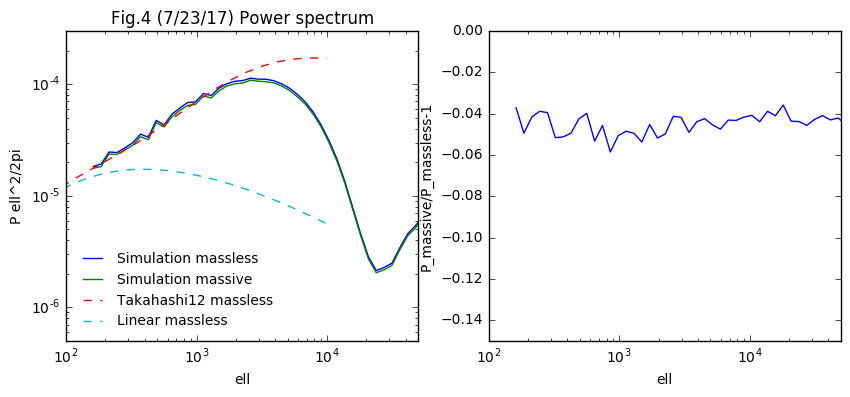

In [95]:
f=figure(figsize=(10,4))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

ax1.loglog(ell, ps0_z1,label='Simulation massless')
ax1.loglog(ell, ps1_z1,label='Simulation massive')
#loglog(ell_As, ps_As,'--',label='nicaea, normalization=A_s')
ax1.loglog(ell0_s8, ps0_s8,'--',label='Takahashi12 massless')
ax1.loglog(ell0_s8_linear, ps0_s8_linear,'--',label='Linear massless')
#loglog(ell_nicaea_linear, ps_nicaea_linear,'--')
ax1.set_xlabel('ell')
ax1.set_ylabel('P ell^2/2pi')
ax1.set_xlim(1e2, 5e4)
ax1.set_ylim(5e-7, 3e-4)
ax1.legend(loc=0,frameon=0,fontsize=10)
ax1.set_title('Fig.4 (7/23/17) Power spectrum')

ax2.plot(ell, ps1_z1/ps0_z1-1)
ax2.set_xscale('log')
ax2.set_xlim(1e2, 5e4)
ax2.set_ylim(-.15,0)
ax2.set_xlabel('ell')
ax2.set_ylabel('P_massive/P_massless-1')

show()

In [37]:
conv_massive_z1100 = fits.open('sample_maps/mnv0.10000_om0.30000_As2.1000/WLconv_z1100.00_0001r.fits')[0].data
conv_massles_z1100 = fits.open('sample_maps/mnv0.00000_om0.30000_As2.1000/WLconv_z1100.00_0001r.fits')[0].data

ell1100, ps0_z1100 = WLanalysis.PowerSpectrum(conv_massles_z1100, sizedeg = 3.5**2)
ell1100, ps1_z1100 = WLanalysis.PowerSpectrum(conv_massive_z1100, sizedeg = 3.5**2)
ell0_s8cmb, ps0_s8cmb = genfromtxt('/Users/jia/Desktop/nicaea_2.7/Demo/P_kappa_1100').T

In [88]:
out1100_0 = array([ps_gen('sample_maps/mnv0.00000_om0.30000_As2.1000/WLconv_z1100.00_000%ir.fits'%(i),sizedeg=3.5**2) 
                 for i in range(1,10)])

ell1100, ps0_z1100 = mean(out1100_0, axis=0)

out1100_1 = array([ps_gen('sample_maps/mnv0.10000_om0.30000_As2.1000/WLconv_z1100.00_000%ir.fits'%(i),sizedeg=3.5**2) 
                 for i in range(1,10)])

ell1100, ps1_z1100 = mean(out1100_1, axis=0)

In [116]:
from scipy.interpolate import interp1d

k_arr = logspace(-2,1.5,100)

####### test matter power spectrum for massive P_cdm vs P_matter
kcamb0_z2, Ptot0_z2 = loadtxt('/Users/jia/Documents/weaklensing/kspace_nu/neutrino-batch/camb/camb_mnv0.00000_om0.30000_As2.1000_matterpow_2.dat').T


kTF_z2, Ttot_z2, Tnn_z2, Tnu_z2 = loadtxt('/Users/jia/Documents/weaklensing/kspace_nu/neutrino-batch/camb/camb_mnv0.10000_om0.30000_As2.1000_transfer_2.dat').T[[0,6,7,5]]
kcamb_z2, Ptot_z2 = loadtxt('/Users/jia/Documents/weaklensing/kspace_nu/neutrino-batch/camb/camb_mnv0.10000_om0.30000_As2.1000_matterpow_2.dat').T

Ptot0_z2_interp = interp1d(kcamb0_z2, Ptot0_z2)(k_arr)
Ptot_z2_interp = interp1d(kcamb_z2, Ptot_z2)(k_arr)

ratio_nn = interp1d(kTF_z2, (Tnn_z2/Ttot_z2)**2)(k_arr)

Pnonu_z2_interp = Ptot_z2_interp * ratio_nn


In [ ]:
kmat0, pmat0 = loadtxt('camb/camb_mat_massless.txt').T
kmat1, pmat1 = loadtxt('camb/camb_mat_massive.txt').T

f=figure(figsize=(10,4))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

ax1.loglog(ell1100, ps0_z1100,label='Simulation massless')
ax1.loglog(ell1100, ps1_z1100,label='Simulation massive')
ax1.loglog(ell0_s8cmb, ps0_s8cmb,'--',label='Takahashi12 massless')
#ax1.loglog(ell0_s8cmb, ps0_s8cmb*0.85,'--',label='Takahashi12 massless*0.85')

ax1.set_xlabel('ell')
ax1.set_ylabel('P ell^2/2pi')
ax1.set_xlim(1e2, 5e4)
ax1.set_ylim(1e-4, 3e-2)
ax1.legend(loc=0,frameon=0,fontsize=10)
ax1.set_title('Fig.5 (8/14/17) Power spectrum CMB')

ax2.plot(ell1100, ps1_z1100/ps0_z1100-1, label='sims')
ax2.plot(ell1100, ps1_z1100/mean(ratio_nn)/ps0_z1100-1, label='sims/ratio')
ax2.plot(kmat1, pmat1/pmat0-1,label='camb (mat)')
ax2.set_xscale('log')
ax2.legend(loc=0,frameon=0,fontsize=10)
ax2.set_xlim(1e2, 5e4)
ax2.set_ylim(-.07,0)
ax2.set_xlabel('ell')
ax2.set_ylabel('P_massive/P_massless-1')

show()

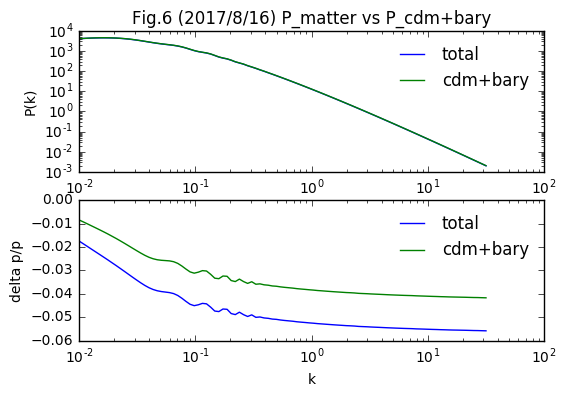

In [111]:
f=figure(figsize=(6,4))
ax1=f.add_subplot(211)
ax2=f.add_subplot(212)

ax1.loglog(k_arr, Ptot_z2_interp,label='total')
ax1.loglog(k_arr, Pnonu_z2_interp,label='cdm+bary')
ax1.set_ylabel('P(k)')
ax1.set_title('Fig.6 (2017/8/16) P_matter vs P_cdm+bary')
ax1.legend(frameon=0)

ax2.plot(k_arr, Ptot_z2_interp/Ptot0_z2_interp-1, label='total')
ax2.plot(k_arr, Pnonu_z2_interp/Ptot0_z2_interp-1, label='cdm+bary')
ax2.set_xlabel('k')
ax2.set_xscale('log')
ax2.set_ylabel('delta p/p')
ax2.legend(frameon=0)
show()

In [93]:
savetxt('ps_massless1-9.txt',array([ell1100, ps0_z1100]).T)
savetxt('ps_massive1-9.txt',array([ell1100, ps1_z1100]).T)
